# __INCREMENTAL CAPSTONE__
<br>
<br>  

## __WEEK 3 - Part A__

__Task: Working with Pandas.__

1. Import relevant python libraries necessary for Python and Pandas analysis. 
2. Import the CSV file NSMES1988new3.csv file and create a new dataframe for working with Pandas.
3. Identify different types of data and report it.
4. Identify Categorical types in the data.
5. Perform a detailed Data pivoting on the dataframe and report it. Include the following categorical data in your analysis: Region and Health.
6. Prepare a detailed report on your analysis observations

__1. Import relevant python libraries necessary for Python and Pandas analysis.__

In [1]:
import pandas as pd
import numpy as np

<br>

__2. Import the CSV file NSMES1988new2.csv file and create a new dataframe for working with Pandas.__

In [2]:
df = pd.read_csv("../data/NSMES1988.csv")
df.head()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


<br>

__3. Identify different types of data and report it.__

In [3]:
df.head(10)

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no
5,6,17,0,0,0,0,0,poor,5,limited,other,6.6,female,no,7,0.3301,no,no,yes
6,7,9,0,0,0,0,0,average,0,normal,midwest,7.5,female,no,8,0.8280,no,yes,no
7,8,3,0,0,0,0,0,average,0,normal,midwest,8.7,female,no,8,3.0456,no,yes,no
8,9,1,0,0,0,0,0,average,0,normal,midwest,7.3,female,no,8,3.0456,no,yes,no
9,10,0,0,0,0,0,0,average,0,normal,midwest,7.8,female,no,8,3.0456,no,yes,no


As you can see from the above listing, age and income has been updated and the data is more-or-less ready for further analysis. You can check this with the following functions:

In [4]:
df.describe()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


In [5]:
# Print min and max of age and income
df[['age','income']].min()

age       6.6000
income   -1.0125
dtype: float64

In [6]:
# Print min and max of age and income
df[['age','income']].max()

age       10.9000
income    54.8351
dtype: float64

In [7]:
# Drop samples for which income <=0
df = df[df['income']>0]

In [8]:
# Print min of income
df['income'].min()

np.float64(0.0014)

Analysis:
Now, let's focus on the visits part. There are 3 columns of importance - visits, nvisits, ovisits and novisits.
- visits: This corresponds to Number of physician office visits.
- nvisits: This corresponds to Number of non-physician office visits. 
- ovisits: This corresponds to Number of physician hospital outpatient visits.
- novisits: This corresponds to Number of non-physician hospital outpatient visits.
- emergency: This corresponds to Number of Emergency room visits by physicians (although not stated). This is inferred, as there is no role for non-physician visits hospital or out-patient, during an emergency. This is crucual for Data Scientist.
- hospital: This corresponds to Number days of hospital stays. 
- chronic: This corresponds to Number of chronic conditions. If you can query the chronic data, the number ranges from (0, 8) which indicate just a number. From the given data, it can only be inferred that 8 is the most chronic, while 0 is the least chronic. Chrono means time. It could be number of weeks, days, or years. Most usually, the term chronic is applied to years, and let's us assume that.

<br>

__4. Identify Categorical types in the data.__

In [9]:
df.head(2)

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no


The following are the categorical data:
- health
- adl
- region
- afam
- gender
- married
- employed
- insurance
- medicaid

Of the above, the last three, could have been boolean data. As you can see from the data, the values for these three columns are yes or no. Since nothing has been said about it, we are not going to make any changes to the existing dataframe.

<br>

__5. Perform a detailed Data pivoting on the dataframe and report it. Include the following categorical data in your analysis: Region and Health.__

Region

In this step, we will analyse the data, based on the region-wise data, as obtained by the data piviting method, as shown above.

From the above pivot table, many things can be inferred. Average age is uniformly spread across all the four regions. Hospital visit in the west is more than the other regions, and so is the income. The other region presents a higher chronic condition.


In [ ]:
# Pivot on region
pivot_region = df.pivot_table(df,index='region',aggfunc='mean')
pivot_region

In [ ]:
# Equivalently, we can obtain the same result using groupby
df.groupby('region').mean()

Health

In this section, we will perform the analysis by pivoting on the health categorical data.
From the above pivot table, many things can be inferred. For example, chronic conditions are highest among the poor health. Likewise, the emergency visits are least among the excellent health. Similarly, the average income is also the highest among the excellent health.


In [ ]:
# Pivot on health
# Pivot on region
pivot_region = df.pivot_table(df,index='health',aggfunc='mean')
pivot_region

<br>

__6. Prepare a detailed report on your analysis observations.__

This week, many aspects of data analysis were covered, particularly pandas. The activities included data reading and cleansing, specific analysis on age and income were carried out and some special points were noted, particularly on the income part.

Further, pivoting was done on two categorical data - region and health. Many interesting observations were done and noted, based on the analysis


<br>

## __WEEK 3 - Part B__

__Task: Analyse and Cleanse data.__

 
1. Import relevant python libraries.
2. Import the CSV file NSMES1988new3.csv file and create a new dataframe for working with Pandas.
3. Perform analysis based on the following criteria<br>
3.1 Different types of visits<br>
3.2 Gender<br>
3.3 Marital Status<br>
3.4 School<br>
3.5 Income<br>
3.6 Employment Status<br>
3.7 Insurance<br>
3.8 Medical Aid<br>

4. Correlate between the following:<br>
4.1 Age and Gender<br>
4.2 Health and Gender<br>
4.3 Income and Gender<br>
4.4 Afam and Income<br>
4.5 Region and Income<br>
4.6 Age and Income<br>

5.Report your findings.


<br>

__1. Import relevant python libraries.__

In [22]:
import numpy as np
import pandas as pd

<br>

__2. Import the CSV file – NSMES1988new.csv into a dataframe, and enforce the dtypes recommended in step 9 of Week 1.__

In [ ]:
df = pd.read_csv('NSMES1988new3.csv')
df.head()

<br>

__3. Perform analysis based on the following criteria__<br>

__3.1 Different types of visits<br>
3.2 Gender<br>
3.3 Marital Status<br>
3.4 School<br>
3.5 Income<br>
3.6 Employment Status<br>
3.7 Insurance<br>
3.8 Medical Aid<br>__

__3.1 Different types of visits<br>__

There are 7 different kind of visits that can be observed from the data. They are as follows:<br>
visits<br>
nvisits<br>
ovisits<br>
novisits<br>
emergency, and<br>
hospital<br>
Let's carve out a sub-dataframe of different types of visits, and analyse:


In [24]:
visits = ['visits','nvisits','ovisits','novisits','emergency','hospital']

In [ ]:
df_visits = df[visits]
df_visits.head()

In [ ]:
df_visits.describe()

From the above description, a number of observations can be made. For example, novisits has been the highest, and hospitalization visits has been the lowest, as indicated by the max count (BTW, count, min and max are essentially integers, but pandas converts them into float for computation purposes). If you consider the mean value, the visits has the highest value (5.77) while emergency as the lowest (0.263504).

3.2 Gender<br>

In [ ]:
# Count values for gender
df['gender'].value_counts()

In [ ]:
# Remark
df['gender'].unique()

3.3 Marital Status<br>

In [ ]:
# Count values for marital status
df['married'].value_counts()

3.4 School<br>

In [ ]:
df['school'].value_counts()

3.5 Income<br>

In [ ]:
# Describe income
df['income'].describe()

3.6 Employment Status<br>

In [ ]:
# Count values for employed
df['employed'].value_counts()

3.7 Insurance<br>

In [ ]:
# Count values for insurance
df['insurance'].value_counts()

3.8 Medical Aid<br>

In [ ]:
# Count values for medicaid
df['medicaid'].value_counts()

<br>

__4. "Correlate" between the following:<br>__

__4.1 Age and Gender<br>
4.2 Health and Gender<br>
4.3 Income and Gender<br>
4.4 Afam and Income<br>
4.5 Region and Income<br>
4.6 Age and Income<br>.__

4.1 Age and Gender<br>

In [36]:
df_age = df.groupby(['age'])

In [ ]:
df_age.head(2)

In [ ]:
df_age.count().head(5)

In [ ]:
df_age.count()['visits']

In [ ]:
df_age.size()

In [ ]:
df_age['income'].mean()

In [ ]:
df_age['income'].max()

In [ ]:
df.groupby(['age','gender']).size()

In [ ]:
df.groupby(['age','gender']).size().unstack()

4.2 Health and Gender<br>

In [ ]:
df.groupby(['health','gender']).size().unstack()

In [ ]:
# Remark: mean income for each gender and each health category
df.groupby(['health','gender'])['income'].mean().unstack()

4.3 Income and Gender<br>

In [ ]:
df.groupby('gender')['income'].mean()

4.5 Region and Income<br>

In [ ]:
df.groupby('region')['income'].mean()

4.6 Age and Income<br>

In [ ]:
df.groupby('age')['income'].mean()

<br>

__5. Report your findings.__

Focus was particularly on individual aspects of the dataset. Also, analysis was carried out on comparison of disparate sets of data, such as age & income, health & gender, income and gender etc.

Please note that the word correlation is used as comparison, rather than that of the statistical term correlation. This is due to the fact that correlation can be done only on numerical columns, and there are other catagorical columns were used.

For correlating the categorical data, groupby() function was used, and size() function was used on top of this.

Interesting facts were revealed in this assignment. For example, when we invoked groupby() function on health and gender, we could observe that females were almost double that of the male on the average health front, while they were almost equal on the excellent health front.

<br>

## __WEEK 4__

__Task: Visualize data.__

1. Import relevant python libraries necessary for Python and Pandas analysis, as well as visualization
2. Import the CSV file NSMES1988updated.csv file and create a new dataframe for working with Pandas
3. Indicate the plotting library choice and reasons for the choice
4. Plot the analysis done in Week 3 for the categorical data -Health and Region
5. Plot the analyses done in Week 4 (analysis and correlation)
6. Prepare a detailed report and record your observations.

__1. Import relevant python libraries necessary for Python and Pandas analysis, as well as visualization__

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

__2. Import the CSV file NSMES1988updated.csv file and create a new dataframe for working with Pandas__

In [8]:
df = pd.read_csv('../data/NSMES1988.csv')
df.head()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.8810,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.7478,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.6532,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.6588,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.6588,no,yes,no


__3. Indicate the plotting library choice and reasons for the choice__

For 2D plot: matplotlib.pyplot and seaborn

In [21]:
df_num = df.drop(columns=['health','adl','gender','married','employed','insurance','medicaid'])
df_num.head()

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,region,age,school,income
0,1,5,0,0,0,0,1,2,other,6.9,6,2.8810
1,2,1,0,2,0,2,0,2,other,7.4,10,2.7478
2,3,13,0,0,0,3,3,4,other,6.6,10,0.6532
3,4,16,0,5,0,1,1,2,other,7.6,3,0.6588
4,5,3,0,0,0,0,0,2,other,7.9,6,0.6588


__4. Plot the analysis done in Week 3-A for the categorical data -Health and Region__

In [25]:
pivot_region = df_num.pivot_table(df_num, index='region', aggfunc='mean')
pivot_region

,Unnamed: 0,age,chronic,emergency,hospital,income,novisits,nvisits,ovisits,school,visits
region,,,,,,,,,,,
midwest,2374.631806,7.407692,1.460674,0.235091,0.299049,2.513634,0.640449,1.954192,0.714780,10.412273,5.408816
northeast,2082.678614,7.393429,1.488650,0.249701,0.268817,2.679709,0.495818,1.657109,0.796894,10.335723,6.091995
other,2160.654275,7.398699,1.640644,0.283147,0.303594,2.166284,0.579926,1.000000,0.757125,9.590458,5.578067
west,2168.764411,7.411654,1.516291,0.279449,0.304511,3.116505,0.338346,2.339599,0.741855,11.481203,6.368421


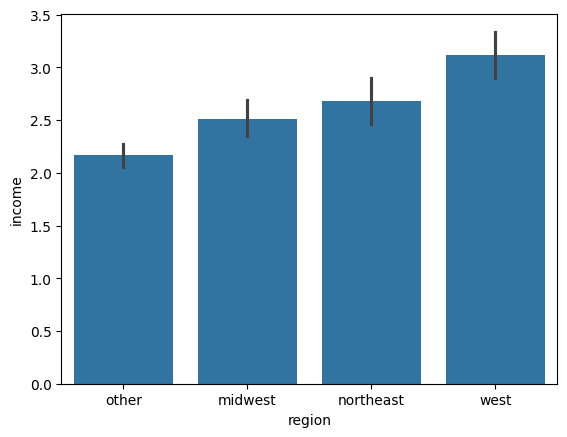

In [43]:
# A good plot to show above data
sns.barplot(x='region', y='income', data=df_num)
plt.show()


__5. Plot the analyses done in Week 4 (analysis and correlation)__

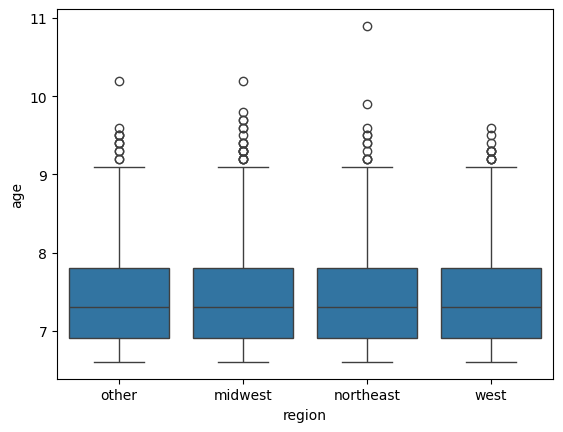

In [31]:
# Region vs. age
sns.boxplot(x='region', y='age', data=df_num)
plt.show()

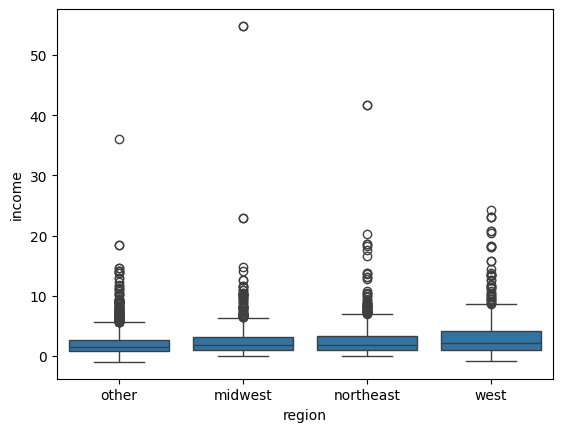

In [32]:
# Region vs. income
sns.boxplot(x='region', y='income', data=df_num)
plt.show()

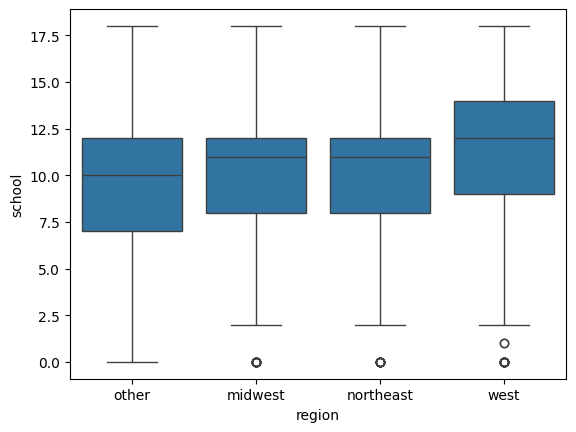

In [33]:
# Region vs. school
sns.boxplot(x='region', y='school', data=df_num)
plt.show()

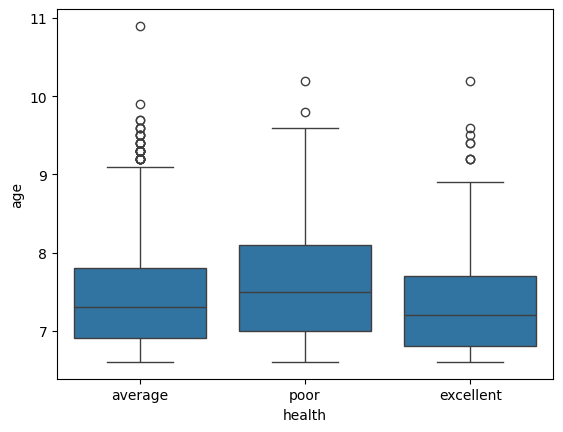

In [35]:
# Health vs. age
sns.boxplot(x='health', y='age', data=df)
plt.show()

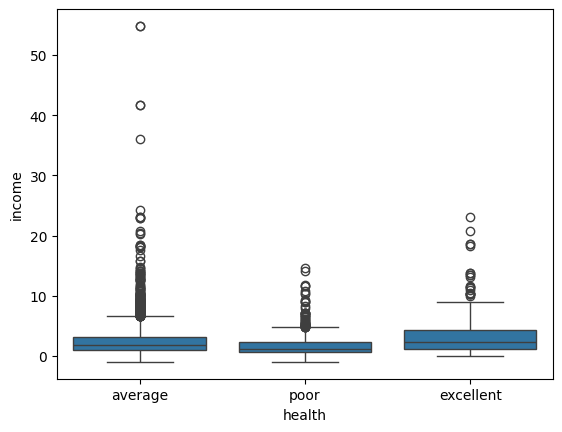

In [37]:
# Health vs. income
sns.boxplot(x='health', y='income', data=df)
plt.show()

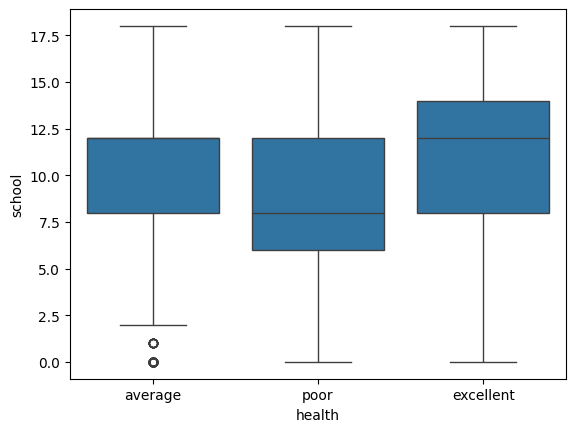

In [39]:
# Health vs. school
sns.boxplot(x='health', y='school', data=df)
plt.show()

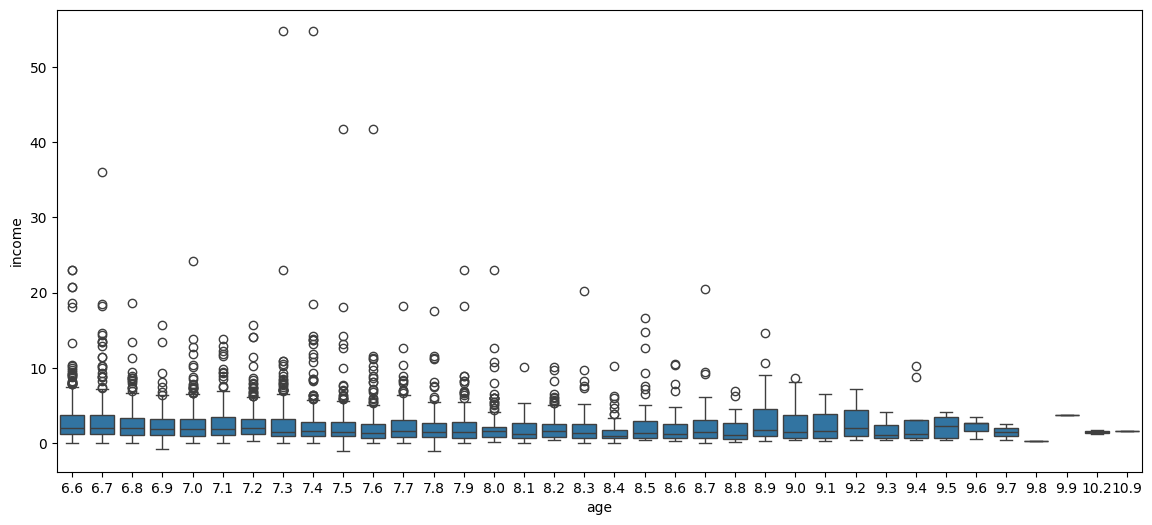

In [48]:
# Age vs. income
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='age', y='income', data=df, ax=ax)
plt.show()


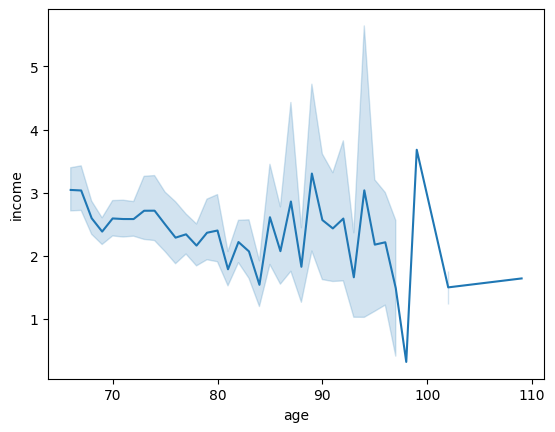

In [ ]:
# Line plot for income and age * 10
df['age'] = df['age'] * 10
sns.lineplot(x='age', y='income', data=df)
plt.show()


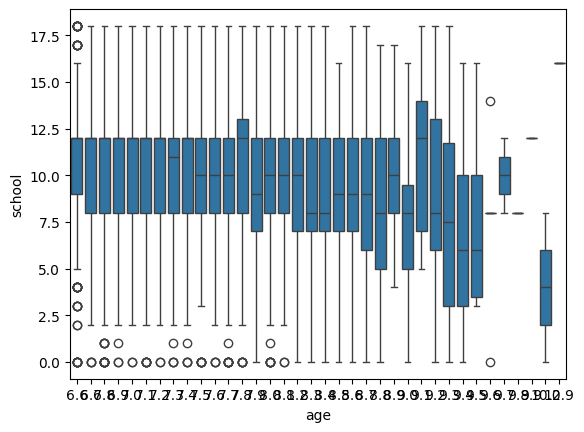

In [41]:
# Age vs. school
sns.boxplot(x='age', y='school', data=df)
plt.show()

__6. Prepare a detailed report and record your observations.__

This week, we culminated with the visualization part of the data science. We analysed many things across the given dataset, after cleansing. We chose seaborn as the appropriate plotting library for visualization.

Using the data generated from Week 3 and Week 4, graphs were generated. Box plots were primarily used to do statistical inference. We also plotted line plot, but avoided barplot, as the outliers play spoilsport in many cases.

Region wise and Health wise graphs were generated and analysed and reported.